## lib 와 데이터 로딩

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 문제정의
- 나이와 연봉을 분석해서, 구매 가능성을 추정    
    - 어떤 고객이 구매할 가능성이 높은지 예측
    - 고객 세분화 : 나이, 성별, 연봉에 따른 구매 패턴 분석
    - 마케팅 타겟팅 : 구매 가능성 높은 고객군 식별

## 데이터 수집
- 마케팅/광고 캠페인 반응 데이터
    - User ID: 고객 ID
    - Gender: 성별 (Male/Female)
    - Age: 나이
    - EstimatedSalary: 추정 연봉
    - Purchased: 구매 여부 (0=구매 안 함, 1=구매함)

In [3]:
data_path = 'datas_ml/Social_Network_Ads.csv'
df= pd.read_csv(data_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [6]:
#y 칼럼의 value count 확인
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## 데이터 EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## 데이터 전처리

In [10]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### X, y 데이터로 분할

In [13]:
X = df.loc[:,'Gender':'EstimatedSalary']
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [15]:
y = df['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [16]:
X['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [18]:
# map() 함수 사용.
mapping = {'Male':0,'Female':1}
X['Gender']= X['Gender'].map(mapping)
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
## 객체생성
X_scaler = StandardScaler()

In [26]:
# X_scaler.fit(X)
# X_scaler.transform(X)

#위의 두 문장을 한꺼번에 실행하는 method

X_scaled = X_scaler.fit_transform(X)

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]], shape=(400, 3))

## 학습, 테스트 데이터 분할

In [27]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.25, random_state=2025)

In [31]:
X_train.shape, y_train.shape

((300, 3), (300,))

In [32]:
X_test.shape, y_test.shape

((100, 3), (100,))

## 모델 학습 및 평가

### 모델 객체 생성

In [33]:
from sklearn.linear_model import LogisticRegression

In [46]:
# 모델 객체생성 
model_logrc = LogisticRegression()

In [47]:
model_logrc

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 모델 학습

In [48]:
#fit 즉 학습시에는 대입을 하지 않는다.
model_logrc.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [49]:
#w1 + w2 + w3
model_logrc.coef_ 

array([[-0.07376459,  2.13814734,  0.93544376]])

In [50]:
# w0
model_logrc.intercept_

array([-1.07696502])

In [55]:
y_prob = model_logrc.predict_proba(X_test)

### 모델 테스트

In [51]:
y_pred = model_logrc.predict(X_test)

In [53]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [56]:
df_y = pd.DataFrame(y_prob)

In [58]:
df_y['y_pred'] = y_pred
df_y

,0,1,y_pred
0,0.684828,0.315172,0
1,0.819139,0.180861,0
2,0.938148,0.061852,0
3,0.808753,0.191247,0
4,0.948851,0.051149,0
...,...,...,...
95,0.419908,0.580092,1
96,0.900597,0.099403,0
97,0.865012,0.134988,0
98,0.792956,0.207044,0


### 모델 평가- 정확도(Accuracy)

In [60]:
# 예측과 실제가 얼마나 정확한가.
# (y_test == y_pred).sum() 
(y_test == y_pred).sum() / len(y_test), 정ㅁ

np.float64(0.88)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test, y_pred)

0.88

### 모델 평가- 정밀도(precesion), 적중률(recall)

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [79]:
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report

In [80]:
# 적중률
recall_score(y_test, y_pred)

0.7567567567567568

In [81]:
# 정밀도
precision_score(y_test, y_pred)

0.9032258064516129

In [83]:
#ML의 종합 평가 함수
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        63
           1       0.90      0.76      0.82        37

    accuracy                           0.88       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.88      0.88      0.88       100



In [70]:
result = y_test.to_frame()

In [73]:
result['predict']= y_pred
result

,Purchased,predict
63,1,0
97,1,0
57,0,0
91,0,0
96,0,0
...,...,...
386,1,1
172,0,0
102,0,0
120,0,0


In [76]:
result = result.reset_index()

In [77]:
result

,index,Purchased,predict
0,63,1,0
1,97,1,0
2,57,0,0
3,91,0,0
4,96,0,0
...,...,...,...
95,386,1,1
96,172,0,0
97,102,0,0
98,120,0,0


### 시각화 및 전략

In [85]:
import seaborn as sb

<Axes: >

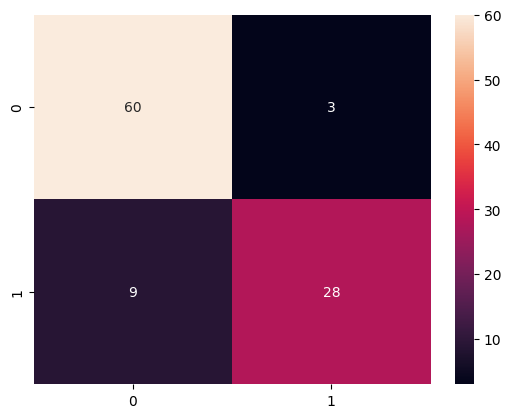

In [87]:
sb.heatmap(data=cm, annot=True)

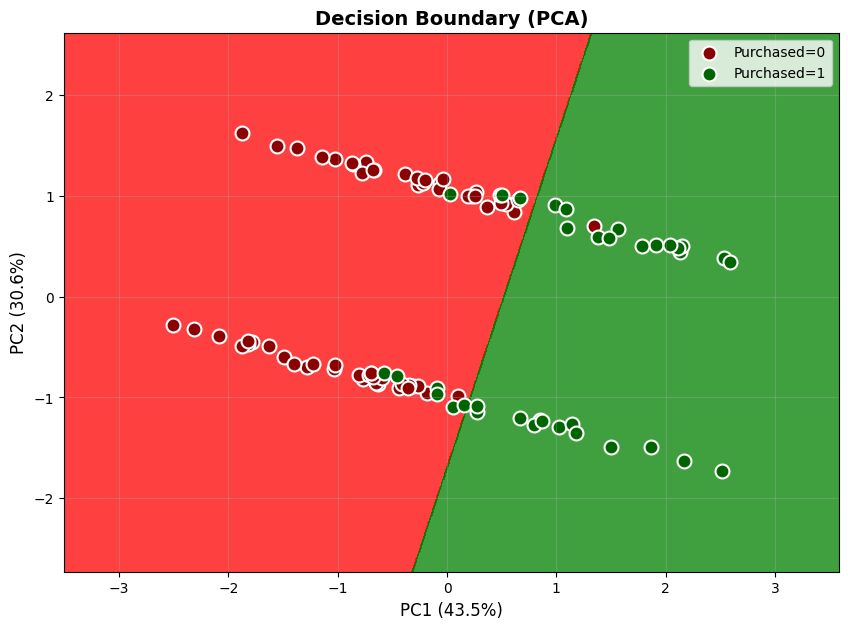

In [88]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# 3D → 2D 차원 축소
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

# 2D meshgrid
X1, X2 = np.meshgrid(
    np.arange(X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1, 0.01),
    np.arange(X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1, 0.01)
)

# 원래 3D 공간으로 역변환 후 예측
X_grid_2d = np.c_[X1.ravel(), X2.ravel()]
X_grid_3d = pca.inverse_transform(X_grid_2d)
predictions = model_logrc.predict(X_grid_3d).reshape(X1.shape)

# 시각화
plt.figure(figsize=(10, 7))
plt.contourf(X1, X2, predictions,
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

for i, j in enumerate([0, 1]):
    plt.scatter(X_test_2d[y_test == j, 0], 
               X_test_2d[y_test == j, 1],
               c='darkred' if j == 0 else 'darkgreen',
               label=f'Purchased={j}',
               edgecolors='white',
               s=100,
               linewidth=1.5)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
plt.title('Decision Boundary (PCA)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()